<a href="https://colab.research.google.com/github/sebacea/tallerecopub/blob/master/Taller9/Proyecto_7_Doing_Economics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oferta y demanda

[Fuente: Core Econ](https://www.core-econ.org/doing-economics/book/text/07-01.html)

[Versionamiento](https://github.com/sebacea/tallerecopub/blob/master/Taller9/Proyecto_7_Doing_Economics.ipynb)

## Material teórico

[Sección 7.3](https://www.core-econ.org/espp/book/text/07.html#73-the-demand-curve-and-willingness-to-pay),
[Sección 7.9](https://www.core-econ.org/espp/book/text/07.html#79-buying-and-selling-demand-and-supply-in-a-competitive-market) y [Sección 7.10](https://www.core-econ.org/espp/book/text/07.html#710-demand-and-supply-in-a-competitive-market-bakeries) 



In [1]:
library(tidyverse)
library(readxl)
library(httr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
url1 <- 'https://tinyco.re/1316611'
GET(url1, write_disk(tf <- tempfile(fileext = ".xlsx")))
# Excel filename
wm_data = read_excel(tf,
  # Sheet name
  sheet = "Sheet1", na = "NA")

Response [https://www.core-econ.org/index.php?uamfiletype=attachment&uamgetfile=/home/u2-fh44hj396xne/www/core-econ.org/public_html/wp-content/uploads/2018/06/Project-7-datafile.xlsx]
  Date: 2021-09-07 15:05
  Status: 200
  Content-Type: application/vnd.openxmlformats-officedocument.spreadsheetml.sheet; charset=binary
  Size: 20.6 kB
<ON DISK>  /tmp/RtmpQ20jYk/file4050632da4.xlsxNULL

In [3]:
str(wm_data)

tibble [22 × 10] (S3: tbl_df/tbl/data.frame)
 $ Year              : num [1:22] 1930 1931 1932 1933 1934 ...
 $ log q 
(Q)     : num [1:22] 4.45 4.36 4.2 4.03 4.1 ...
 $ log h 
(X)     : num [1:22] 4.38 4.33 4.05 4.01 4.09 ...
 $ log p 
(P)     : num [1:22] 4.76 4.61 4.37 4.53 4.64 ...
 $ log p_c 
(C)   : num [1:22] 2.25 1.73 1.87 2.32 2.51 ...
 $ log p_v 
(T)   : num [1:22] 0.845 2.726 2.588 2.286 1.476 ...
 $ log w 
(W)     : num [1:22] 3.37 3.14 2.83 2.77 2.92 ...
 $ log n 
(N)     : num [1:22] 4.81 4.82 4.83 4.83 4.84 ...
 $ log(y/n) 
(Y/N): num [1:22] 6.4 6.24 5.97 5.9 6.02 ...
 $ log p_f 
(F)   : num [1:22] 2.54 2.55 2.6 2.65 2.62 ...


Usaremos la función `exp` para crear las variables `p` y `q` a partir de sus logaritmos (representados por las variables `log.p` y `log.q` respectivamente). También transformaremos la variable cosecha (en logaritmo denotada por `log.h`) y la almacenaremos como `h`. La cosecha será a lo sumo igual al cultivo (`q`).

In [4]:
names(wm_data) <- c("Año", "log.q", "log.h", "log.p", 
  "log.pc", "log.pv", "log.w", "log.n", "log.yn", "log.pf")
wm_data$p <- exp(wm_data$log.p)  # Precio
wm_data$h <- exp(wm_data$log.h)  # Cantidad cosechada
wm_data$q <- exp(wm_data$log.q)  # Cantidad cultivada

Grafiquemos usando la función `plot` para generar el gráfico de precios con `Año` en el eje horizontal (`xlab`) y el precio (`p`) en el eje vertical (`ylab`).

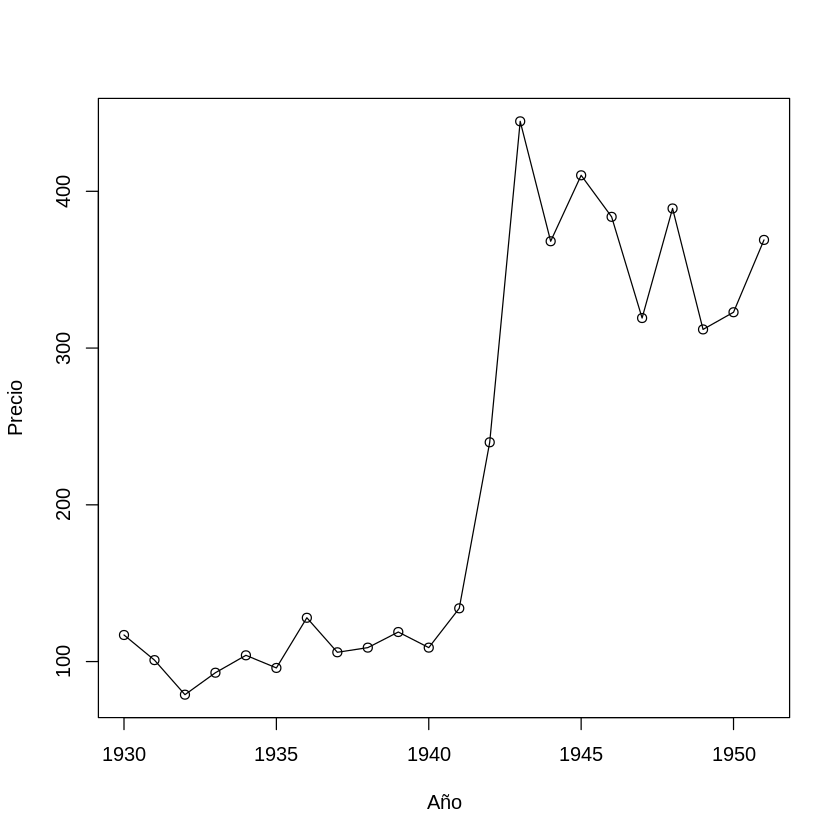

In [7]:
# type: "p" = points, "l" = lines, "o" = points and lines
plot(wm_data$Año, wm_data$p, type = "o",
  xlab = "Año", ylab = "Precio")  

En lo que sigue, creamos graficamos la evolución de las cantidades cosechadas y cultivadas (variables `h` y `q` respectivamente). Primero graficamos las cantidades cultivadas como una línea discontinua (`lty = "dashed"`), luego usamos `lines` para agregar una línea solida con los datos de cosecha. La función `legend` agrega la leyenda en coordenadas determinadas (los primeros 2 argumentos de la función).

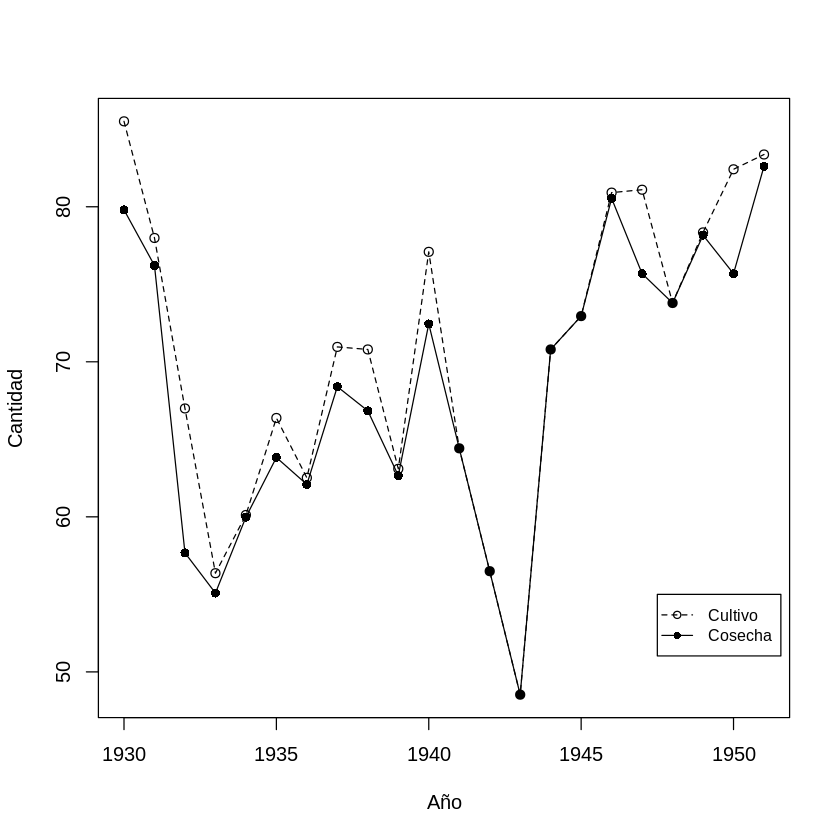

In [8]:
# type: "p" = points, "l" = lines, "o" = points and lines
plot(wm_data$Año, wm_data$q, type = "o",
  pch = 1, lty = "dashed", 
  xlab = "Año", ylab = "Cantidad")  

# Add the harvest data
lines(wm_data$Año, wm_data$h, type = "o", pch = 16)

# Add a legend
legend(1947.5, 55, legend = c("Cultivo", "Cosecha"),
  col = c("black", "black"), pch = c(1, 16), 
  lty = c("dashed", "solid"), cex = 0.8)

Ahora graficaremos una versión simplificada del modelo de ofertay demanda presentado en el artículo. Definiremos $Q$ como la cantidad de sandías, en millones, y $P$ como el precio por mil sandías, asumiendo que la curva de oferta está dada por la siguiente ecuación:

(Curva de Oferta): $\log P=−2.0+1.7 \log Q$ 

Con la misa notación, la ecuación siguiente describe la curva de demanda:

(Curva de Demanda): $\log P=8.5−0.82 \log Q$

To plot a curve, we need to generate a series of points (vertical axis values that correspond to particular horizontal axis values) and join them up. First we will work with the variables in natural log format, and then we will convert them to the actual prices and quantities so that our supply and demand curves will be in familiar units.